In [29]:
pip install --upgrade scikit-learn

##Import Dependecies

In [30]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

##Load Data and Split Data

In [31]:
#load data split into train and test
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_train.csv")

In [32]:
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype = 'float32')

In [33]:
#Letter categories for images
categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Label for the image is:  G


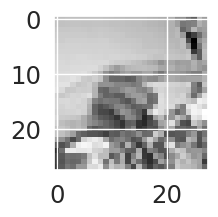

In [34]:
#Check to see if data pixels provide accurate shape
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray')
print("Label for the image is: ", categories[int(train_data[i,0])])

##Check to see if Data is unbalanced

Text(0.5, 1.0, 'Label')

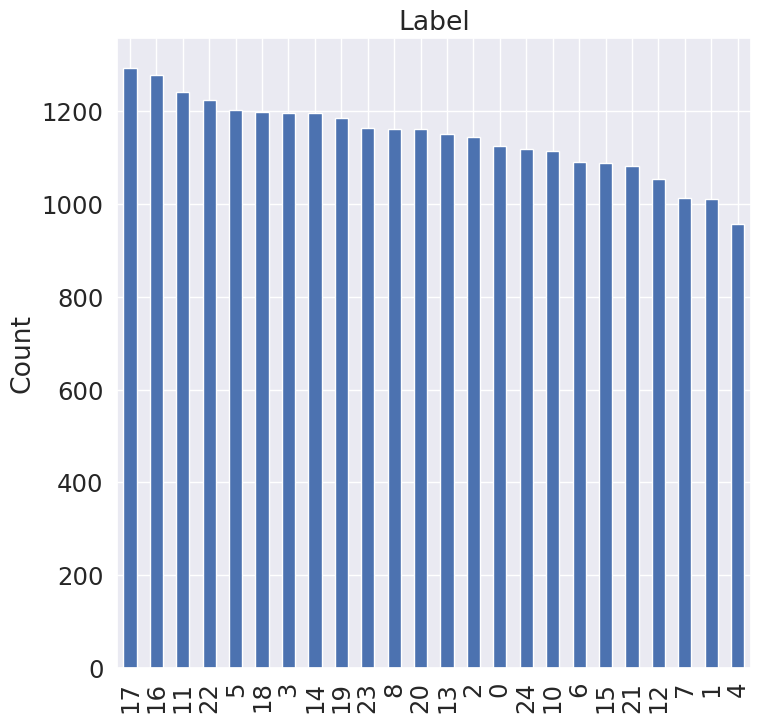

In [35]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [36]:
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

In [37]:
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

In [38]:
y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

In [39]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

##Model

In [40]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))


In [41]:
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

In [42]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

In [ ]:
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat), callbacks = [checkpoint])



Epoch 1/10
215/215 [==============================] - ETA: 0s - loss: 2.5965 - acc: 0.2008

215/215 [==============================] - 56s 244ms/step - loss: 2.5965 - acc: 0.2008 - val_loss: 1.4560 - val_acc: 0.5536
Epoch 2/10
215/215 [==============================] - ETA: 0s - loss: 1.1443 - acc: 0.6235

215/215 [==============================] - 39s 180ms/step - loss: 1.1443 - acc: 0.6235 - val_loss: 0.5949 - val_acc: 0.8162
Epoch 3/10
215/215 [==============================] - ETA: 0s - loss: 0.6494 - acc: 0.7788

215/215 [==============================] - 34s 157ms/step - loss: 0.6494 - acc: 0.7788 - val_loss: 0.2845 - val_acc: 0.9229
Epoch 4/10
215/215 [==============================] - ETA: 0s - loss: 0.4096 - acc: 0.8617

215/215 [==============================] - 36s 169ms/step - loss: 0.4096 - acc: 0.8617 - val_loss: 0.1449 - val_acc: 0.9745
Epoch 5/10
215/215 [==============================] - ETA: 0s - loss: 0.2790 - acc: 0.9068

215/215 [==============================] - 36s 166ms/step - loss: 0.2790 - acc: 0.9068 - val_loss: 0.0788 - val_acc: 0.9878
Epoch 6/10
215/215 [==============================] - ETA: 0s - loss: 0.2048 - acc: 0.9319

215/215 [==============================] - 38s 179ms/step - loss: 0.2048 - acc: 0.9319 - val_loss: 0.0416 - val_acc: 0.9954
Epoch 7/10
215/215 [==============================] - ETA: 0s - loss: 0.1500 - acc: 0.9519

215/215 [==============================] - 35s 163ms/step - loss: 0.1500 - acc: 0.9519 - val_loss: 0.0276 - val_acc: 0.9981
Epoch 8/10
215/215 [==============================] - ETA: 0s - loss: 0.1195 - acc: 0.9612

215/215 [==============================] - 38s 177ms/step - loss: 0.1195 - acc: 0.9612 - val_loss: 0.0154 - val_acc: 0.9994
Epoch 9/10
215/215 [==============================] - ETA: 0s - loss: 0.1004 - acc: 0.9683

215/215 [==============================] - 37s 173ms/step - loss: 0.1004 - acc: 0.9683 - val_loss: 0.0115 - val_acc: 0.9997
Epoch 10/10
215/215 [==============================] - ETA: 0s - loss: 0.0790 - acc: 0.9748

215/215 [==============================] - 37s 174ms/step - loss: 0.0790 - acc: 0.9748 - val_loss: 0.0068 - val_acc: 1.0000


In [ ]:
model.save('model.h5')

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

In [ ]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)
prediction = np.argmax(predictions, axis=1)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction, average='macro')
recall = recall_score(y_test, prediction, average='macro')
f1 = f1_score(y_test, prediction, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Accuracy Score = ', accuracy)

In [ ]:
i = random.randint(1,len(prediction))
plt.imshow(X_test[i,:,:,0])
print("Predicted Label: ", categories[int(prediction[i])])
print("True Label: ", categories[int(y_test[i])])

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(len(categories)), categories, rotation=90)